In [1]:
print("Loading Libraries...")
import os, sys
import csv
import platform
import numpy as np
import pandas as pd
import dask.dataframe as dd
import scipy
import sklearn
import matplotlib.pyplot as plt
import flask
import math
import scipy.interpolate as scin
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn import neighbors, datasets
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [2]:
#Local
print("Loading directories..")
#path_data = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01'
#path_post = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-tip-post'
path_acu = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-tip-post/acu'
path_plots = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-tip-post/plots'
path_coords = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-tip-post/coords'
path_rms = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-tip-post/rms'
path_fft = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-tip-post/fft'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [3]:
os.chdir(path_coords)
coords = pd.DataFrame(pd.read_csv('int-tip_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')

In [4]:
x = coords['x-coordinate']
y = coords['y-coordinate']
z = coords['z-coordinate']

In [ ]:
x

In [5]:
os.chdir(path_acu)
batch_data = dd.read_csv('*', delimiter=",", decimal='.',usecols=["nodenumber", "sound-pressure", "sound-intensity"])
batch_data = batch_data.set_index("nodenumber")

In [6]:
batch_min = pd.DataFrame(batch_data.min().compute())
batch_max = pd.DataFrame(batch_data.max().compute())

In [18]:
spl_min = batch_min.iloc[[0]][0]
sil_min = batch_min.iloc[[1]][0]
spl_max = batch_max.iloc[[0]][0]
sil_max = batch_max.iloc[[1]][0]

In [19]:
spl_min

sound-pressure   -63412.143615
Name: 0, dtype: float64

In [ ]:
spl_max

In [ ]:
sil_min

In [ ]:
sil_max

In [8]:
data = pd.DataFrame(pd.read_csv('int-tip_acu_83371.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl = data['sound-pressure']
spl_db = data['spl-db']
sil = data['sound-intensity']
sil_db = data['sil-db']

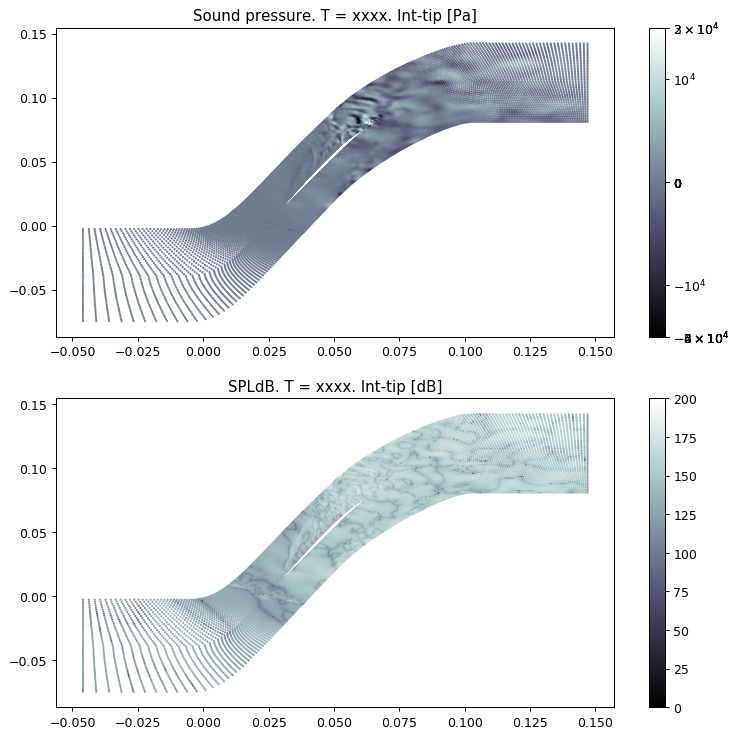

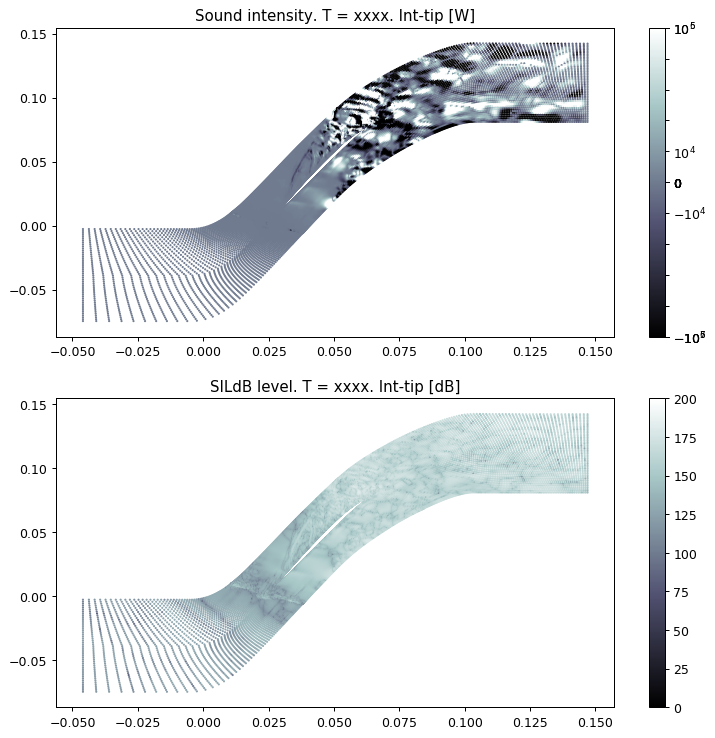

In [30]:
dupa, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=90)
spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.bone, norm=colors.SymLogNorm(linthresh=15000, linscale=15000, vmin=spl_min[0], vmax=spl_max[0]))
dupa.colorbar(spl_plot, ax=ax0)
ax0.set_title("Sound pressure. T = xxxx. Int-tip [Pa]")
spldb_plot = ax1.scatter(z, x, c=spl_db, s=0.5, vmin=0, vmax=200, cmap=plt.cm.bone)
dupa.colorbar(spldb_plot, ax=ax1)
ax1.set_title("SPLdB. T = xxxx. Int-tip [dB]")
plt.show()
#os.chdir(path_plots)
#plt.savefig(str('int-01_acu_RMS.png'))
#print("Plotting RMS done...")

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=90)
sil_plot = ax0.scatter(z, x, c=sil, s=0.5, cmap=plt.cm.bone, norm=colors.SymLogNorm(linthresh=50000, linscale=50000, vmin=sil_min[0], vmax=sil_max[0]))
fig.colorbar(sil_plot, ax=ax0)
ax0.set_title("Sound intensity. T = xxxx. Int-tip [W]")
sildb_plot = ax1.scatter(z, x, c=sil_db, s=0.5, vmin=0, vmax=200, cmap=plt.cm.bone)
fig.colorbar(spldb_plot, ax=ax1)
ax1.set_title("SILdB level. T = xxxx. Int-tip [dB]")
plt.show()
#os.chdir(path_plots)
#plt.savefig(str('int-01_acu_RMS.png'))
#print("Plotting RMS done...")

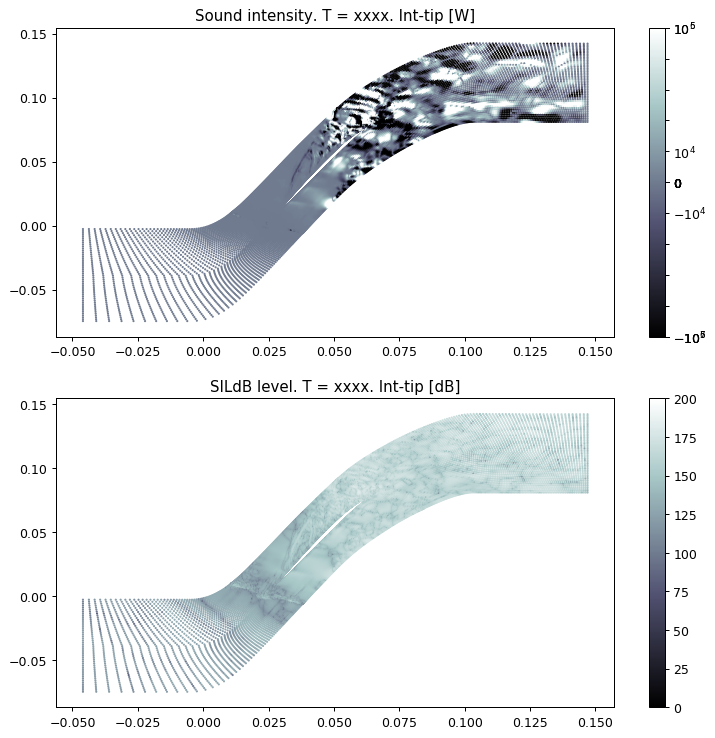

In [27]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=90)
sil_plot = ax0.scatter(z, x, c=sil, s=0.5, cmap=plt.cm.bone, norm=colors.SymLogNorm(linthresh=50000, linscale=50000, vmin=sil_min[0], vmax=sil_max[0]))
fig.colorbar(sil_plot, ax=ax0)
ax0.set_title("Sound intensity. T = xxxx. Int-tip [W]")
sildb_plot = ax1.scatter(z, x, c=sil_db, s=0.5, vmin=0, vmax=200, cmap=plt.cm.bone)
fig.colorbar(spldb_plot, ax=ax1)
ax1.set_title("SILdB level. T = xxxx. Int-tip [dB]")
plt.show()
#os.chdir(path_plots)
#plt.savefig(str('int-01_acu_RMS.png'))
#print("Plotting RMS done...")

In [ ]:
os.chdir(path_rms)
rms = pd.DataFrame(pd.read_csv('int-01_rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')

In [ ]:
rms

In [ ]:
spl = rms['sound-pressure']
min_splrms = spl.min()
max_splrms = spl.max()

sil = rms['sound-intensity']
min_silrms = sil.min()
max_silrms = sil.max()

spldb = rms['rms_spldb']
min_spldb = spldb.min()
max_spldb = spldb.max()

sildb = rms['rms_sildb']
min_sildb = rms_sildb.min()
max_sildb = rms_sildb.max()

In [ ]:
max_spldb

In [ ]:
print("Plotting RMS values...")
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=300)
spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.bone, norm=colors.SymLogNorm(linthresh=15000, linscale=15000, vmin=min_splrms, vmax=max_splrms))
fig.colorbar(spl_plot, ax=ax0)
ax0.set_title("RMS sound pressure. Int-01 [Pa]")
spldb_plot = ax1.scatter(z, x, c=spldb, s=0.5, vmin=0, vmax=194, cmap=plt.cm.bone)
fig.colorbar(sil_plot, ax=ax1)
ax1.set_title("RMS dB level. Int-01 [dB]")
plt.show()
#os.chdir(path_plots)
#plt.savefig(str('int-01_acu_RMS.png'))
#print("Plotting RMS done...")

In [ ]:
os.chdir(path_fft)
fft = pd.DataFrame(pd.read_csv('int-01-post_fft_max.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')

In [ ]:
fft

In [ ]:
print("Plotting RMS values...")
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=300)
spl_plot = ax0.scatter(z, x, c=fft['node_FREQ_max'], s=0.5, cmap=plt.cm.bone)
fig.colorbar(spl_plot, ax=ax0)
ax0.set_title("RMS sound pressure. Int-01 [Pa]")
spldb_plot = ax1.scatter(z, x, c=spldb, s=0.5, vmin=0, vmax=194, cmap=plt.cm.bone)
fig.colorbar(sil_plot, ax=ax1)
ax1.set_title("RMS dB level. Int-01 [dB]")
plt.show()
#os.chdir(path_plots)
#plt.savefig(str('int-01_acu_RMS.png'))
#print("Plotting RMS done...")

In [ ]:
print("Starting plotting loop...")
os.chdir(path_acu)
filelist = os.listdir(path_acu)
for file in filelist:
    timestep = str(os.path.basename(str(file)))[11:-4]
    os.chdir(path_acu)
    acu = pd.read_csv(file, sep=',', decimal='.', header=0)
    x = acu['x-coordinate']
    y = acu['y-coordinate']
    z = acu['z-coordinate']
    spl = acu['sound-pressure']
    dbl = acu['db-level']
    fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=300)
    spl_plot = ax0.scatter(z, x, c=spl, s=2, cmap=plt.cm.bone, norm=colors.SymLogNorm(linthresh=5000, linscale=5000, vmin=-15000, vmax=12000))
    fig.colorbar(spl_plot, ax=ax0)
    ax0.set_title(str('Sound pressure. Int-01. Time: ' + str(timestep)))
    dbl_plot = ax1.scatter(z, x, c=dbl, s=2, vmin=min_dbl, vmax=max_dbl, cmap=plt.cm.bone)
    fig.colorbar(dbl_plot, ax=ax1)
    ax1.set_title(str('dB level. Int-01. Time: ' + str(timestep)))
    os.chdir(path_plots)
    plt.savefig(str('int-01_acu_t_' + str(timestep) + '.png'))
    plt.close()
    print(str('int-01_acu_t_' + str(timestep) + '.png done...'))
print("Exiting plotting loop...")